# Solar Orbiter HET data

## Only for Google Colab users:

In [ ]:
%pip install --upgrade ipympl speasy

In [ ]:
try:
    from google.colab import output
    output.enable_custom_widget_manager()
except:
    print("Not running inside Google Collab")

## For all users:

In [ ]:
import speasy as spz
%matplotlib widget
# Use this instead if you are not using jupyterlab yet
#%matplotlib notebook

import matplotlib
import matplotlib.pyplot as plt

import pandas as pd
import numpy as np


In [3]:
start = "2020-11-28T00:00:00"
stop = "2020-12-05T00:00:00"

## Solar Orbiter electron flux

In [7]:
solo_eflux:spz.SpeasyVariable = spz.get_data("amda/solo_het_omni_eflux", start, stop)

In [8]:
print(np.unique(np.diff(solo_eflux.time), return_counts=True))

(array([1000000000, 1001000000], dtype='timedelta64[ns]'), array([603798,   1000]))


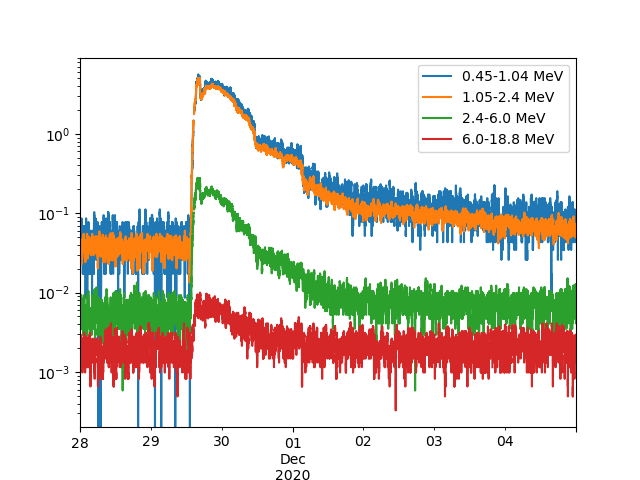

In [9]:
eflux_df = solo_eflux.to_dataframe()
# resample to 1s
eflux_df = eflux_df.resample("1s").ffill()
eflux_df.rolling(600).mean().plot()
plt.yscale("log")

## Solar Orbiter proton flux

In [14]:
solo_hflux:spz.SpeasyVariable = spz.get_data("amda/solo_het_omni_hhcflux", start, stop)

In [15]:
print(np.unique(np.diff(solo_eflux.time), return_counts=True))

(array([1000000000, 1001000000], dtype='timedelta64[ns]'), array([603798,   1000]))


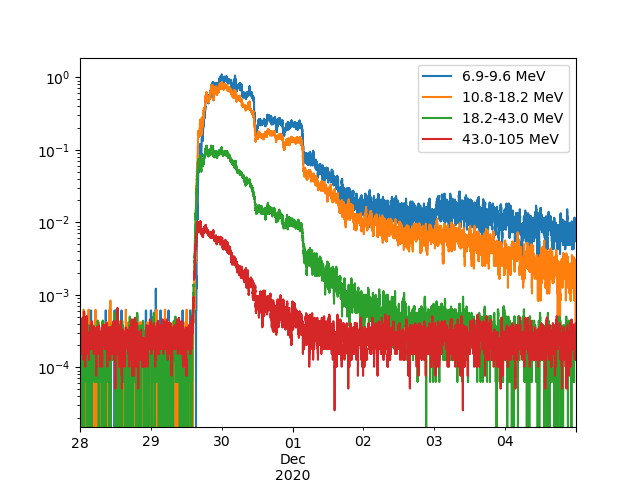

In [16]:
hflux_df = solo_hflux.to_dataframe()
# resample to 1s
hflux_df = hflux_df.resample("1s").ffill()
hflux_df.rolling(600).mean().plot()
plt.yscale("log")

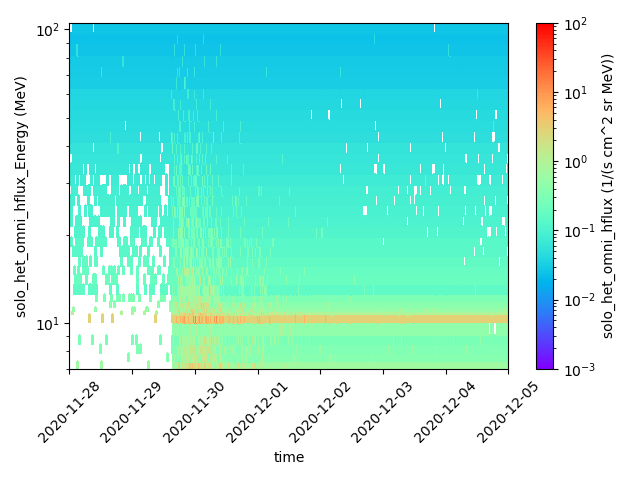

In [17]:
plt.figure()
pas_omni:spz.SpeasyVariable = spz.get_data("amda/solo_het_omni_hflux", start, stop)
pas_omni.plot(cmap='rainbow', vmin=1e-3, vmax=1e2, edgecolors="face")
plt.tight_layout()